## Задание №1
- Считать данные с помощью pandas
- Вывести на экран первые 5 строк

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('laptops_10.csv', encoding='latin-1')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


### 1.1 Изучите количество памяти с помощью matplotlib

In [63]:
df.Memory_Amount.value_counts()

Memory_Amount
256     508
1024    250
128     177
512     140
500     132
32       45
64       17
2048     16
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

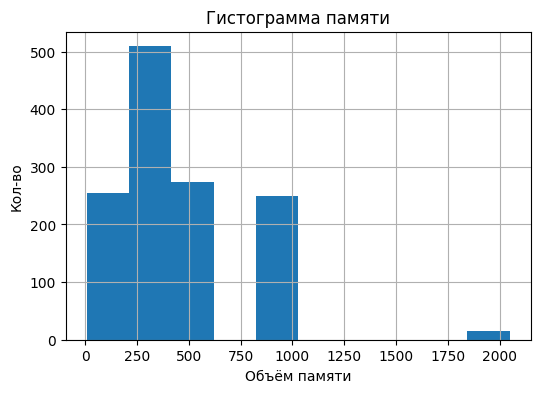

In [64]:
plt.figure(figsize=(6, 4))
plt.hist(df.Memory_Amount)
plt.xlabel('Объём памяти')
plt.ylabel('Кол-во')
plt.title('Гистограмма памяти')
plt.grid()

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib

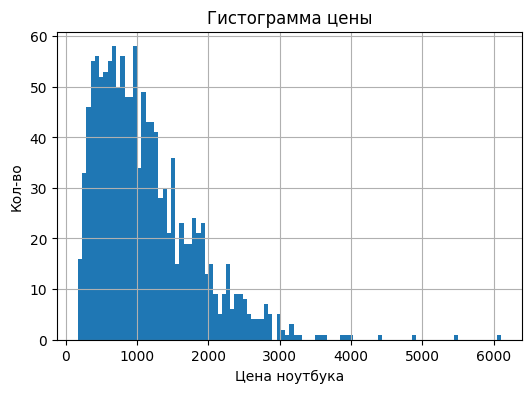

In [65]:
plt.figure(figsize=(6, 4))
plt.hist(df.Price_euros, bins=100)
plt.xlabel('Цена ноутбука')
plt.ylabel('Кол-во')
plt.title('Гистограмма цены')
plt.grid()

### 1.3 Изучите вес ноутбуков с помощью matplotlib

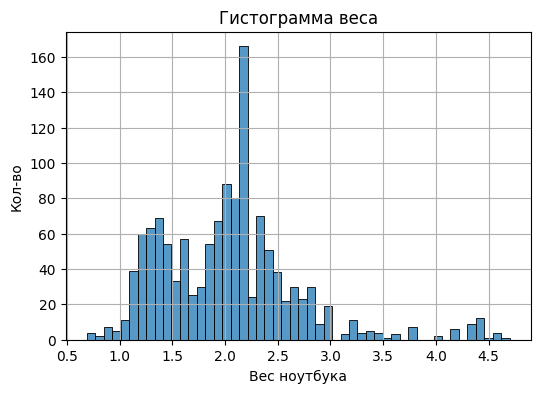

In [66]:
plt.figure(figsize=(6, 4))
sns.histplot(df.Weight, bins=50)
plt.xlabel('Вес ноутбука')
plt.ylabel('Кол-во')
plt.title('Гистограмма веса')
plt.grid()

## Задание №2
### 2.1 Изучите распределение типов носителя

In [67]:
data = df.Memory_Type.value_counts()

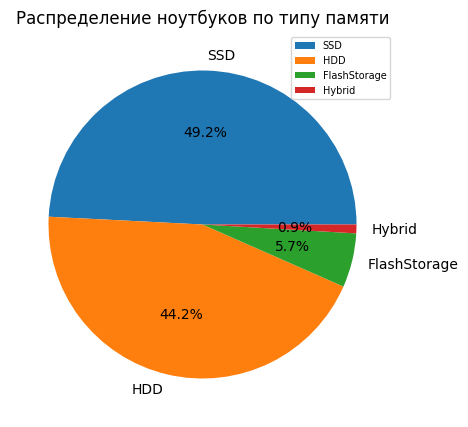

In [68]:
plt.figure(figsize=(6, 5))
plt.pie(data.values, labels=data.index, autopct='%1.1f%%')
plt.title('Распределение ноутбуков по типу памяти')
plt.legend(data.index, loc='best', fontsize=7);

### 2.2 Изучите распределение компаний производителей

In [69]:
data_company = df.Company.value_counts()

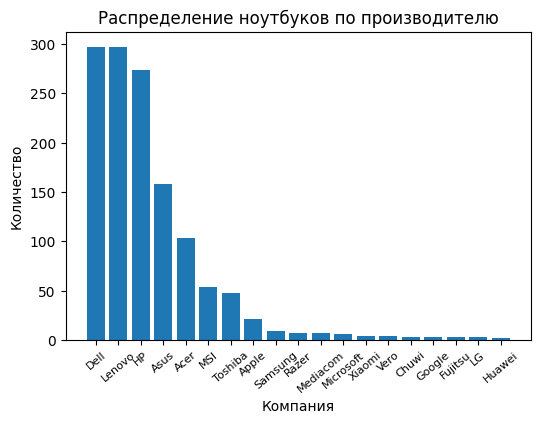

In [70]:
plt.figure(figsize=(6, 4))
plt.bar(data_company.index, data_company.values)
plt.title('Распределение ноутбуков по производителю')
plt.xlabel('Компания')
plt.ylabel('Количество')
plt.xticks(rotation=40, fontsize=8);

### 2.3 Изучите распределение операционной системы


In [71]:
data_os = df.OpSys.value_counts()

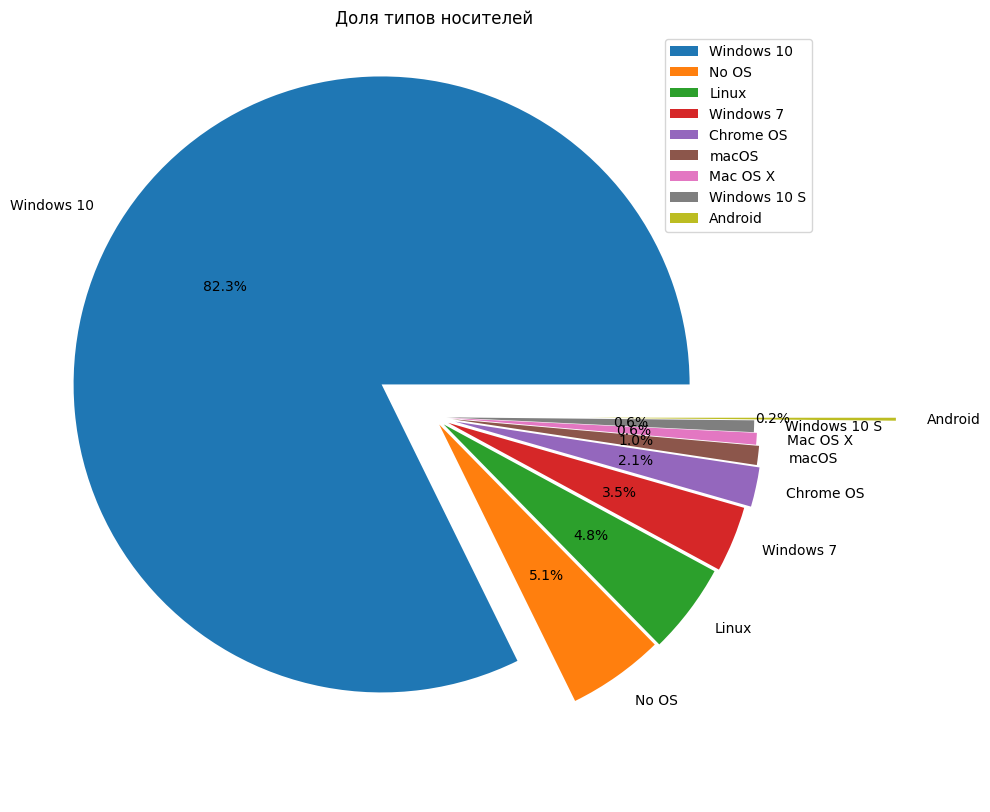

In [72]:
plt.figure(figsize=(10, 10))
expl = [0.2, 0.03, 0.04, 0.05, 0.07, 0.06, 0.05, 0.04, 0.5]
plt.pie(data_os.values, autopct='%1.1f%%', labels=data_os.index, explode=expl)
plt.title('Доля типов носителей')
plt.legend(data_os.index, loc='best');

### 2.4 Изучите распределение компаний производителей CPU

In [73]:
data_cpu_company = df.Cpu_Company.value_counts()

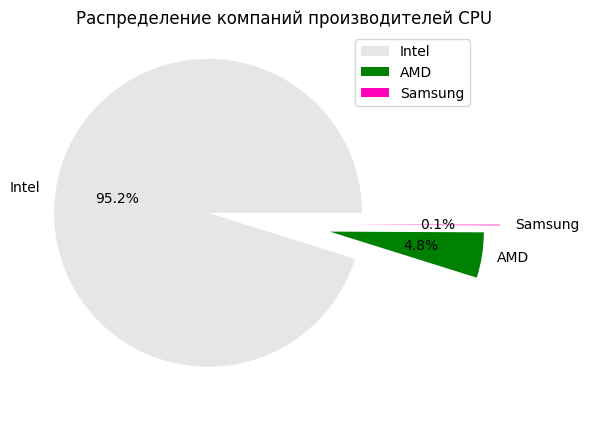

In [74]:
plt.figure(figsize=(5, 5))
explode = [0.5, 0.3, 0.4]
plt.pie(data_cpu_company.values, autopct='%1.1f%%', labels=data_cpu_company.index, explode=explode, colors = ["0.9", "g", "#FF00BB",])
plt.title('Распределение компаний производителей CPU')
plt.legend(data_cpu_company.index, loc='best');

## Задание №3
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму<br>
Процессоры от Samsung не изучайте
### 3.1 Постройте график в абсолютных величинах

In [75]:
data_cpu_companies = pd.crosstab(df.Company, df.Cpu_Company)

In [76]:
data_cpu_companies = data_cpu_companies.drop('Samsung', axis=1).reset_index()
data_cpu_companies.head()

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297


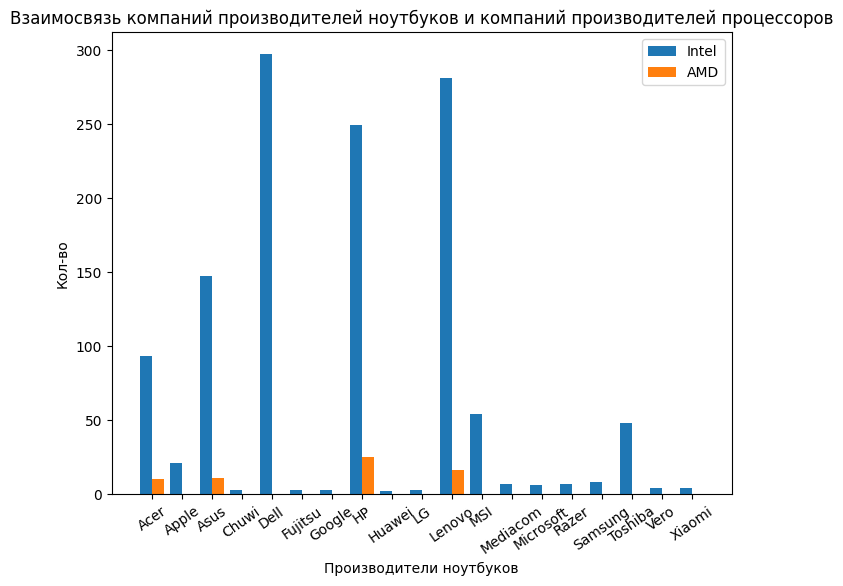

In [77]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data_cpu_companies['Intel']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data_cpu_companies['Intel'], width=w)
plt.bar(n_ticks + offset, data_cpu_companies['AMD'], width=w)

plt.title('Взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, data_cpu_companies['Company'], rotation = 35);  # добавляем метки делений

### 3.2 Постройте график в относительных величинах

In [78]:
data = pd.crosstab(df['Company'], df['Cpu_Company'], normalize='index')
data

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,0.097087,0.902913,0.000000
Apple,0.000000,1.000000,0.000000
Asus,0.069620,0.930380,0.000000
Chuwi,0.000000,1.000000,0.000000
Dell,0.000000,1.000000,0.000000
Fujitsu,0.000000,1.000000,0.000000
Google,0.000000,1.000000,0.000000
HP,0.091241,0.908759,0.000000
Huawei,0.000000,1.000000,0.000000


In [79]:
data = data.drop('Samsung', axis=1).reset_index()
data.head()

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000


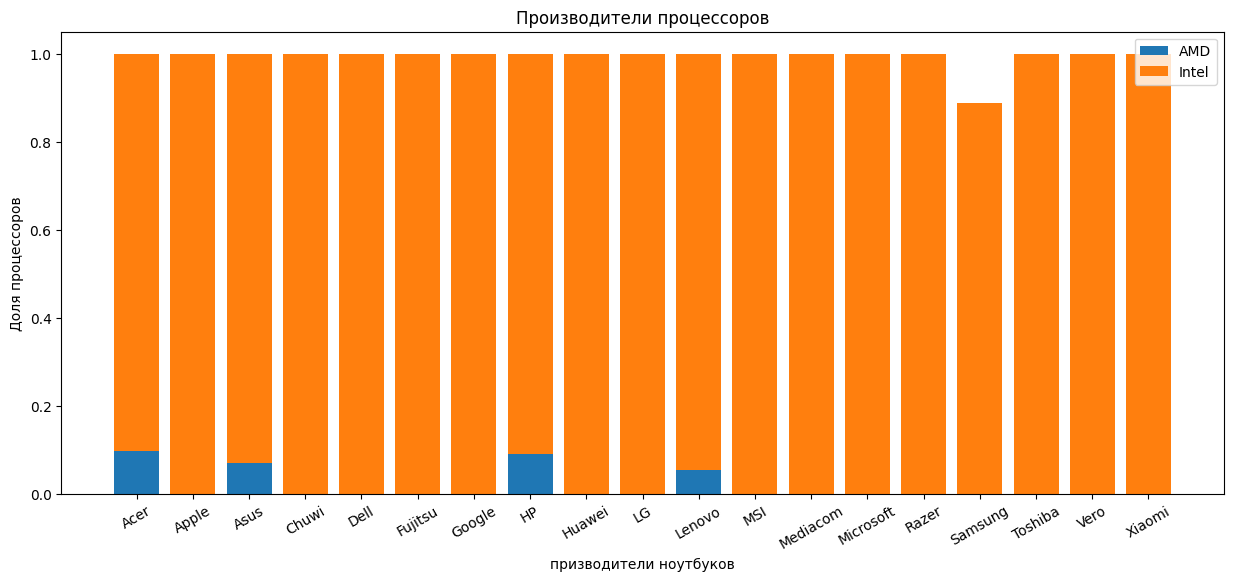

In [80]:
plt.figure(figsize=(15, 6))

plt.bar(data['Company'], data['AMD'])
plt.bar(data['Company'], data['Intel'], bottom=data['AMD'])

plt.title('Производители процессоров')
plt.xlabel('призводители ноутбуков')
plt.ylabel('Доля процессоров')
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation = 30);

## Задание 4.
### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

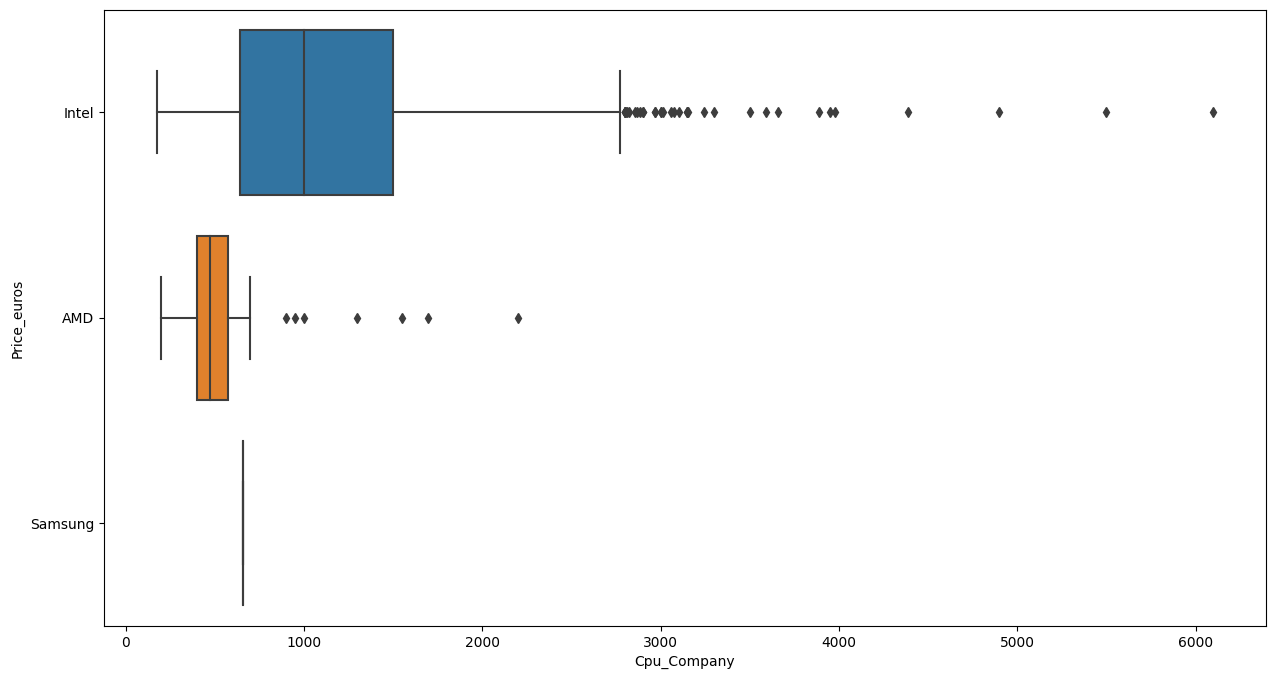

In [81]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["Cpu_Company"], x=df["Price_euros"])
plt.xlabel("Cpu_Company")
plt.ylabel("Price_euros");

### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

<Axes: xlabel='Price_euros', ylabel='Memory_Type'>

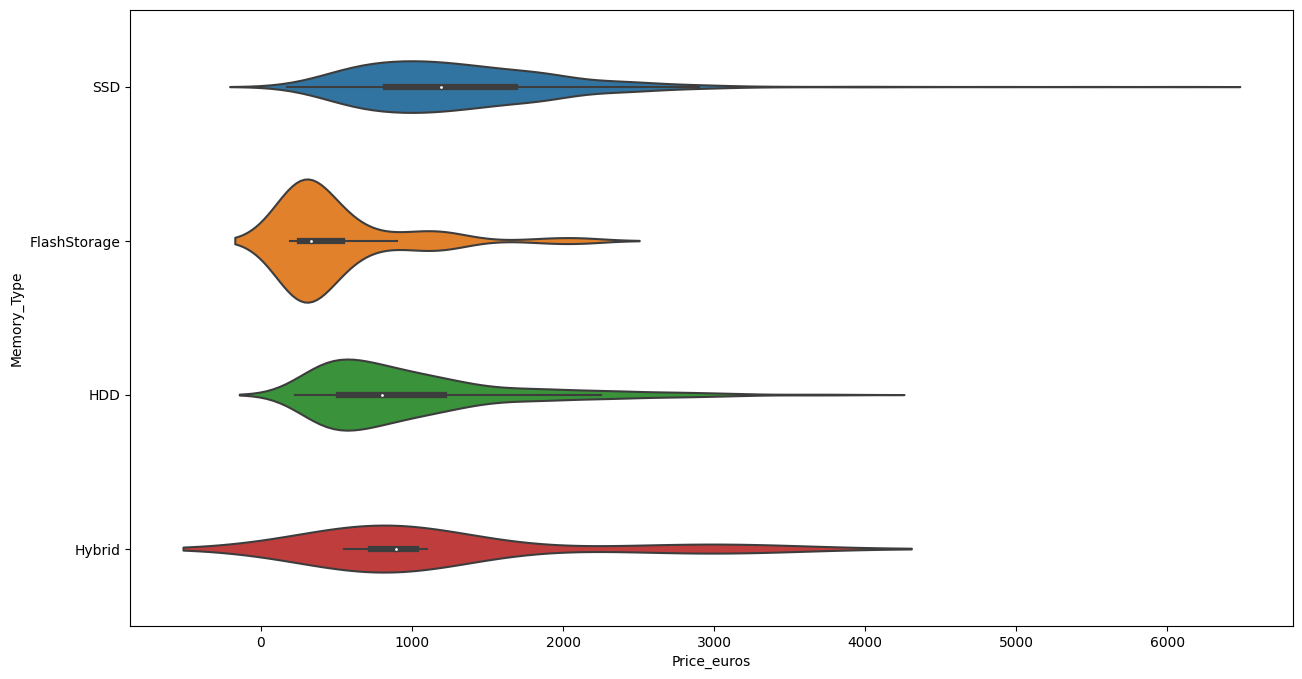

In [82]:
plt.figure(figsize=(15,8))
sns.violinplot(y=df["Memory_Type"], x=df["Price_euros"])

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

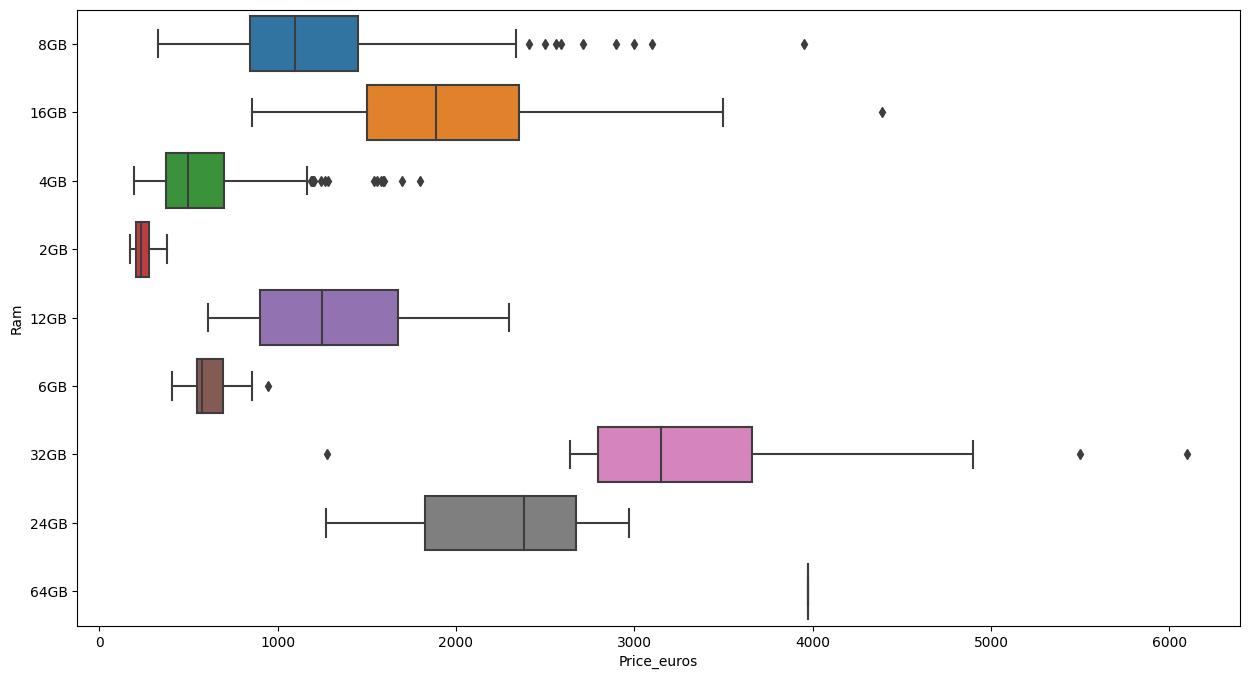

In [83]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["Ram"], x=df["Price_euros"]);

### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

<Axes: xlabel='Price_euros', ylabel='Company'>

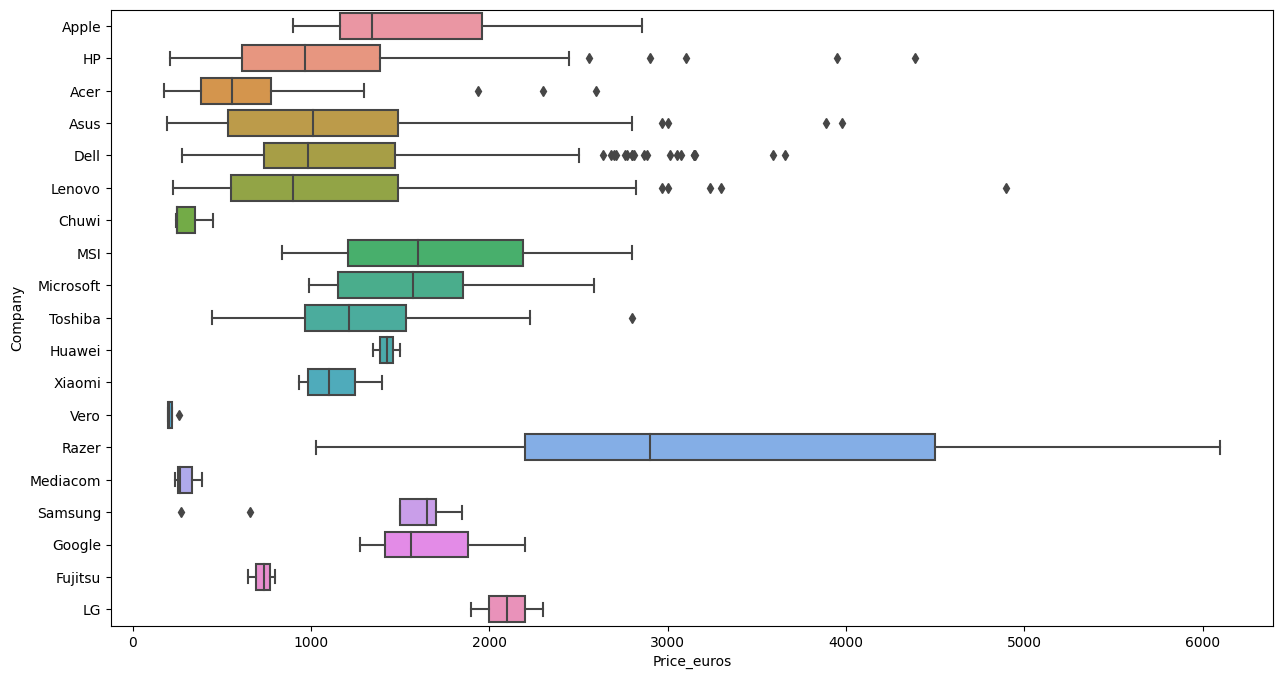

In [84]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["Company"], x=df["Price_euros"])

## Задание 5*.
Постройте матрицу корреляций для таблицы

In [85]:
corr_matrix = df.corr()
corr_matrix

ValueError: could not convert string to float: 'Apple'

In [86]:
corr_matrix = np.round(corr_matrix, 2)
corr_matrix

NameError: name 'corr_matrix' is not defined

* до 0,2 - Очень слабая
* до 0,5 - Слабая
* до 0,7 - Средняя
* до 0,9 - Высокая
* свыше 0,9 - Очень высокая корреляция

In [ ]:
corr_matrix[np.abs(corr_matrix)<=0.2] = 0
corr_matrix

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='mako')

In [ ]:
upp_mat = np.triu(df.corr())

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap = 'viridis', mask = upp_mat)

In [ ]:
pd.plotting.scatter_matrix(df);

In [ ]:
sns.pairplot(df, height=2, kind="scatter", diag_kind="kde")
plt.show()